In [1]:
import patsy 
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.graphics import utils
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

/Users/Dong-hyun/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('./data/train.csv')
pd.set_option('display.max_rows', 100)
df = df.set_index('AnimalID')


df.tail()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A702446,NaN,2015.5.14 11:56,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
A718934,NaN,2016.1.20 18:59,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
A698128,Zeus,2015.3.9 13:33,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
A677478,NaN,2014.4.27 12:22,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
A706629,NaN,2015.7.2 9:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [3]:
df.describe()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,6374,22918,5,16,2,5,44,1380,366
top,Max,2015.8.11 0:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,136,19,10769,7816,15595,9779,3969,8810,2824


In [4]:
df.keys()

Index(['Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype', 'AnimalType',
       'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [5]:
dfy = pd.DataFrame(df, columns=['OutcomeType'])
dfx = df.drop('OutcomeType', axis=1)

In [6]:
dfx.describe()

,Name,DateTime,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,19038,26729,13117,26729,26728,26711,26729,26729
unique,6374,22918,16,2,5,44,1380,366
top,Max,2015.8.11 0:00,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,136,19,7816,15595,9779,3969,8810,2824


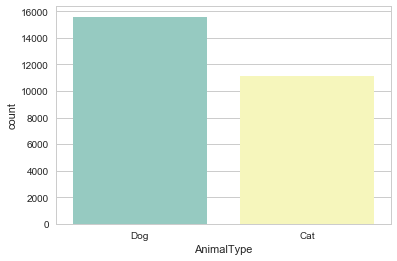

In [7]:
sns.countplot(df.AnimalType, palette='Set3')
plt.show()

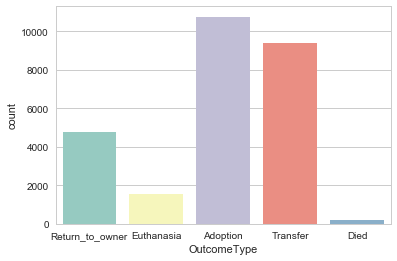

In [8]:
sns.countplot(df.OutcomeType, palette='Set3')
plt.show()

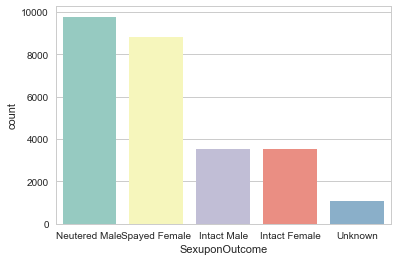

In [9]:
sns.countplot(df.SexuponOutcome, palette='Set3')
plt.show()

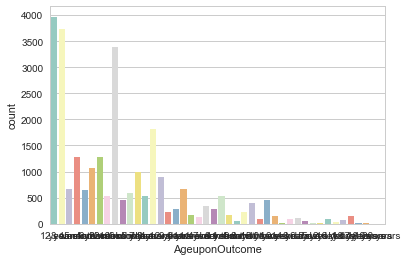

In [10]:
sns.countplot(df.AgeuponOutcome, palette='Set3')
plt.show()

In [11]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

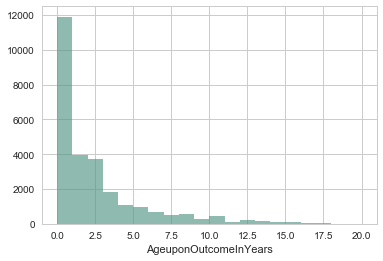

In [13]:
df['AgeuponOutcomeInYears'] = df.AgeuponOutcome.apply(calc_age_in_years)
sns.distplot(df.AgeuponOutcomeInYears, bins = 20, kde=False)
plt.show()

In [15]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
df['AgeCategory'] = df.AgeuponOutcomeInYears.apply(calc_age_category)

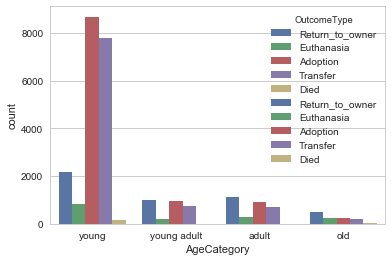

In [17]:
sns.countplot(data=df, x='AgeCategory',hue='OutcomeType')
plt.show()

In [ ]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
df['AgeCategory'] = df.AgeuponOutcomeInYears.apply(calc_age_category)